# Lecture 3: Filters

### Juan Carlos Niebles and Adrien Gaidon

In [55]:
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
from scipy.ndimage.filters import convolve

## Images as Functions

Let's load ```iguana.png``` into ```img``` and display it. Check data type and max/min values.



Image shape is: (310, 433, 4)
255 0


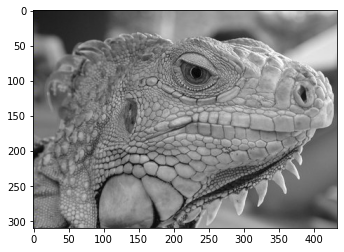

Not the shape we expected?

# Images as Functions

Grayscale images can also be encoded/stored as if they were color images. We can force the image reader to convert the image to grayscale by using ```as_gray=True```. Check the resulting data type and min/max values.

Image shape is: (310, 433)


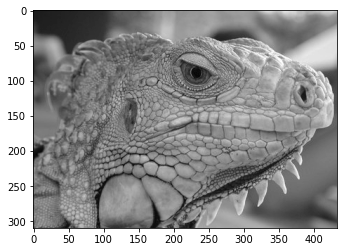

## Images as Functions

We can think of grayscale images as functions that map from $\mathcal R^2 \rightarrow \mathcal R$; that is from $(x,y)$ coordinates in $\mathcal R^2$ to intensity values in $\mathcal R$.

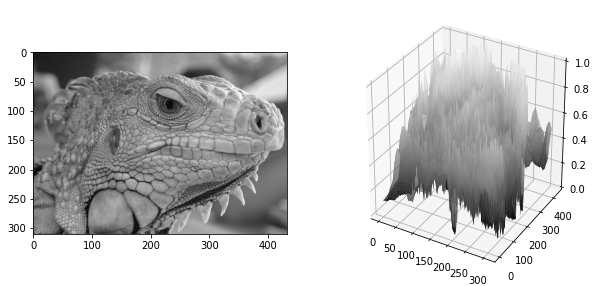

In [16]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img, cmap="gray")

ax2 = fig.add_subplot(1,2,2, projection='3d')
xx, yy = np.mgrid[0:img.shape[0], 0:img.shape[1]]
ax2.plot_surface(xx, yy, img ,rstride=1, cstride=1, cmap=plt.cm.gray,
                 linewidth=0)

## Moving Average Filter

The moving average filter produces a smoothing effect on images. We can implement this with a convolution operation. The kernel for a calculating the moving average over $3 \times 3$ neighborhoods is:

$h = \frac{1}{9}
\begin{bmatrix}
1 & 1 & 1\\
1 & 1 & 1\\
1 & 1 & 1
\end{bmatrix}$

In [17]:
# create kernel matrix h


[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


## Moving Average Filter
Here's an example with a simple matrix $I$. Let's calculate $I \ast h$, where:

$I =
\begin{bmatrix}
0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0\\
\end{bmatrix}$, and $h = \frac{1}{9}
\begin{bmatrix}
1 & 1 & 1\\
1 & 1 & 1\\
1 & 1 & 1
\end{bmatrix}$



In [54]:
I = np.array([[0,0,0,0,0],[0,0,0,0,0],[0,0,1,0,0],[0,0,0,0,0],[0,0,0,0,0]], dtype=float)
convolve(I, h)

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.11111111, 0.11111111, 0.11111111, 0.        ],
       [0.        , 0.11111111, 0.11111111, 0.11111111, 0.        ],
       [0.        , 0.11111111, 0.11111111, 0.11111111, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

## Moving Average Filter

Here's an example with our test image. Check vmin/vmax of output image.

In [3]:
# convolve image

plt.figure(figsize=(16,8))
plt.subplot(1,2,1); plt.imshow(img, cmap="gray")
plt.subplot(1,2,2); plt.imshow(smooth_img, cmap="gray")

NameError: name 'plt' is not defined

## Image Sharpening

We saw that we can obtain a sharpened image $I_{sh}$ by convolving an image $I$ as follows:

$
I_{sh} = I \ast \left( \begin{bmatrix}
0 & 0 & 0\\
0 & 2 & 0\\
0 & 0 & 0
\end{bmatrix} -
\frac{1}{9} \begin{bmatrix}
1 & 1 & 1\\
1 & 1 & 1\\
1 & 1 & 1
\end{bmatrix} \right)
$

Let's implement this. Check vmin/vmax values of output image.

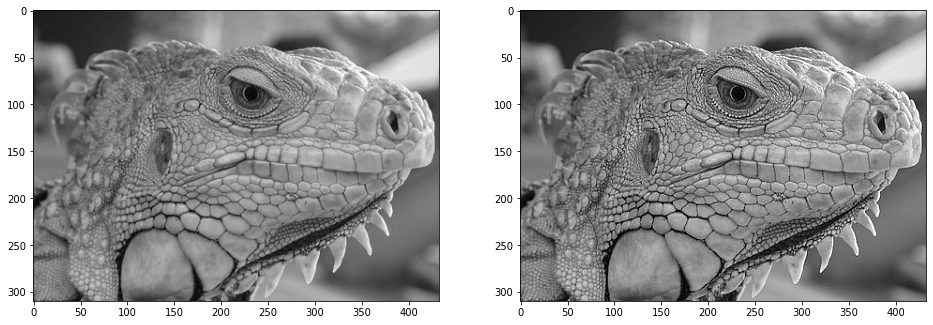

In [60]:
h_sh = np.array([[0,0,0],[0,2,0],[0,0,0]]) - (1/9)*np.ones((3,3))

I_sh = convolve(img,h_sh)
plt.figure(figsize=(16,8))
plt.subplot(1,2,1); plt.imshow(img, cmap="gray")
plt.subplot(1,2,2); plt.imshow(I_sh, cmap="gray",1)

## Convolution and boundary conditions
We saw there are multiple ways to handle the boundary conditions. A common practice is to use "zero padding" (called "constant" below). Other strategies are illustrated here.

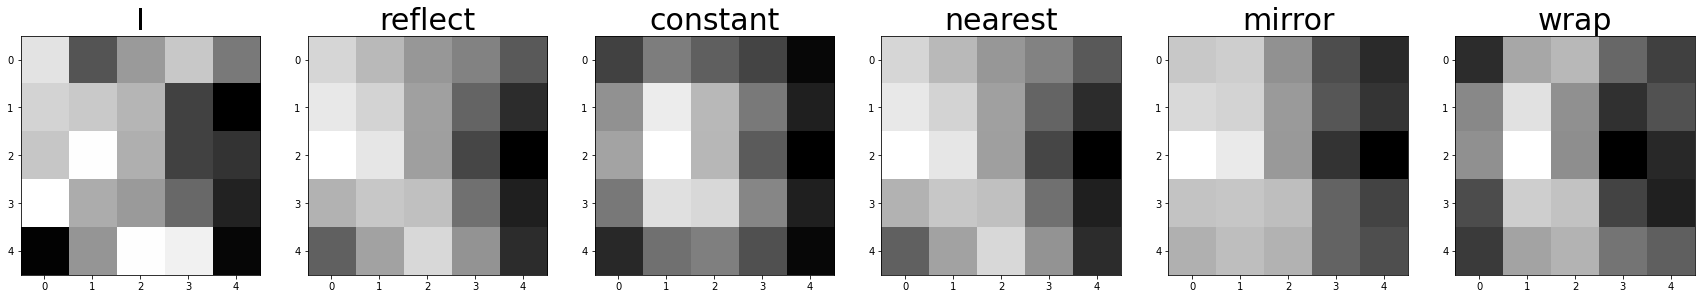

In [61]:
mode_list = ["reflect", "constant", "nearest", "mirror", "wrap"]
I=np.random.rand(5,5)
plt.figure(figsize=(30,5))
plt.subplot(1,len(mode_list)+1, 1); plt.imshow(I, cmap="gray"); plt.title("I", fontsize=30)
for i in range(len(mode_list)):
    I_sh = convolve(I,h, mode=mode_list[i])
    plt.subplot(1,len(mode_list)+1,i + 2); plt.imshow(I_sh, cmap="gray")
    plt.title(mode_list[i], fontsize=30)

## Image Segmentation/Thresholding

Image thresholding cannot be implemented with a convolution, why?
$g[n,m]=\begin{cases} 255, & \text{if $f[n,m]>100$}. \\ 0, & a\end{cases}$

(310, 433)


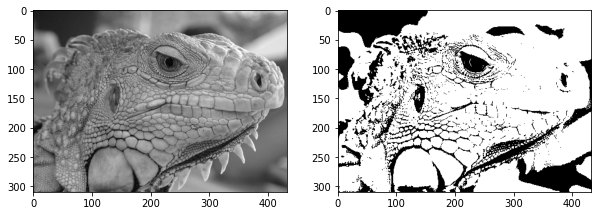

In [77]:
img_thr = (img > 100/255)*255
print(img_thr.shape)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(img, cmap="gray")
plt.subplot(1,2,2); plt.imshow(img_thr, cmap="gray")